In [1]:
import matplotlib.pyplot as plt
import torch.optim as optim
import torch

# **Pre-processing**

> **Separating desired Features and Outputs**

In [2]:
x = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]      # Y
y = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]  # X

t_c = torch.tensor(y)
t_u = torch.tensor(x)


t_un = 0.1 * t_u

> **Splitting Training and Validation Set**


In [3]:
samples = t_u.shape[0]
values = int(0.2 * samples)

shuffle = torch.randperm(samples)
train_idx = shuffle[:-values]
valid_idx = shuffle[-values:]

t_u_train = t_u[train_idx]
t_u_valid = t_u[valid_idx]

t_un_train = t_un[train_idx]
t_un_valid = t_un[valid_idx]

t_c_train = t_c[train_idx]
t_c_valid = t_c[valid_idx]


# **Training**



> **Linear Regression Training**




In [4]:
def lin_model(t_u, w, b):
  return w*t_u + b

def lin_training(epochs, optimizer, params, t_u_train, t_u_valid, t_c_train, t_c_valid):
  for epoch in range(1, epochs+1):
    t_p_train = lin_model(t_u_train, *params)
    train_loss = cost(t_p_train, t_c_train)

    t_p_valid = lin_model(t_u_valid, *params)
    valid_loss = cost(t_p_valid, t_c_valid)

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    if epoch % 500 == 0:
      print(f'Epochs: {epoch}, \tTraining Loss: {train_loss:.6f}, \tValidation Loss: {valid_loss:.6f}')
  print('')
  return params



> **Non-linear Regression Training**




In [5]:
def nonlin_model(t_u, w2, w1, b):
  return w2*t_u**2 + w1*t_u + b

def cost(t_p, t_c):
  squared_diffs = (t_p - t_c)**2
  return squared_diffs.mean()

def nonlin_training(epochs, optimizer, params, t_u_train, t_u_valid, t_c_train, t_c_valid):
  for epoch in range(1, epochs+1):
    t_p_train = nonlin_model(t_u_train, *params)
    train_loss = cost(t_p_train, t_c_train)

    t_p_valid = nonlin_model(t_u_valid, *params)
    valid_loss = cost(t_p_valid, t_c_valid)

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    if epoch % 500 == 0:
      print(f'Epochs: {epoch}, \tTraining Loss: {train_loss:}, \tValidation Loss: {valid_loss}')
  print('')
  return params

# **SGD Optimized Linear Model**

> *Trained with LR of* ***1e-1***

In [6]:
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)

optimizer = optim.SGD([params], lr = 1e-1)

print('Learning rate of 0.1')
nonlin_training(5000, optimizer, params, t_un_train, t_un_valid, t_c_train, t_c_valid)

Learning rate of 0.1
Epochs: 500, 	Training Loss: nan, 	Validation Loss: nan
Epochs: 1000, 	Training Loss: nan, 	Validation Loss: nan
Epochs: 1500, 	Training Loss: nan, 	Validation Loss: nan
Epochs: 2000, 	Training Loss: nan, 	Validation Loss: nan
Epochs: 2500, 	Training Loss: nan, 	Validation Loss: nan
Epochs: 3000, 	Training Loss: nan, 	Validation Loss: nan
Epochs: 3500, 	Training Loss: nan, 	Validation Loss: nan
Epochs: 4000, 	Training Loss: nan, 	Validation Loss: nan
Epochs: 4500, 	Training Loss: nan, 	Validation Loss: nan
Epochs: 5000, 	Training Loss: nan, 	Validation Loss: nan



tensor([nan, nan, nan], requires_grad=True)

> *Trained with LR of* ***1e-2***

In [7]:
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)

optimizer = optim.SGD([params], lr = 1e-2)

print('Learning rate of 0.01')
nonlin_training(5000, optimizer, params, t_un_train, t_un_valid, t_c_train, t_c_valid)

Learning rate of 0.01
Epochs: 500, 	Training Loss: 7.123839378356934, 	Validation Loss: 13.148832321166992
Epochs: 1000, 	Training Loss: 6.372707843780518, 	Validation Loss: 13.93317699432373
Epochs: 1500, 	Training Loss: 6.296506881713867, 	Validation Loss: 14.306702613830566
Epochs: 2000, 	Training Loss: 6.288731098175049, 	Validation Loss: 14.43221664428711
Epochs: 2500, 	Training Loss: 6.287940979003906, 	Validation Loss: 14.472928047180176
Epochs: 3000, 	Training Loss: 6.287864685058594, 	Validation Loss: 14.485955238342285
Epochs: 3500, 	Training Loss: 6.287851333618164, 	Validation Loss: 14.490069389343262
Epochs: 4000, 	Training Loss: 6.287851333618164, 	Validation Loss: 14.491445541381836
Epochs: 4500, 	Training Loss: 6.287856101989746, 	Validation Loss: 14.491710662841797
Epochs: 5000, 	Training Loss: 6.287856101989746, 	Validation Loss: 14.491710662841797



tensor([-1.6386, 22.1287, 31.5716], requires_grad=True)

> *Trained with LR of* ***1e-3***

In [8]:
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)

optimizer = optim.SGD([params], lr = 1e-3)

print('Learning rate of 0.001')
nonlin_training(5000, optimizer, params, t_un_train, t_un_valid, t_c_train, t_c_valid)

Learning rate of 0.001
Epochs: 500, 	Training Loss: 235.511474609375, 	Validation Loss: 330.04998779296875
Epochs: 1000, 	Training Loss: 78.0159912109375, 	Validation Loss: 121.86064147949219
Epochs: 1500, 	Training Loss: 30.28636360168457, 	Validation Loss: 52.551815032958984
Epochs: 2000, 	Training Loss: 15.498435020446777, 	Validation Loss: 28.22511100769043
Epochs: 2500, 	Training Loss: 10.66296672821045, 	Validation Loss: 19.13511085510254
Epochs: 3000, 	Training Loss: 8.88688850402832, 	Validation Loss: 15.525676727294922
Epochs: 3500, 	Training Loss: 8.092720985412598, 	Validation Loss: 14.033479690551758
Epochs: 4000, 	Training Loss: 7.645705223083496, 	Validation Loss: 13.421213150024414
Epochs: 4500, 	Training Loss: 7.345213890075684, 	Validation Loss: 13.198163986206055
Epochs: 5000, 	Training Loss: 7.122550010681152, 	Validation Loss: 13.154495239257812



tensor([-0.7791, 19.7220, 32.4399], requires_grad=True)

> *Trained with LR of* ***1e-4***

In [9]:
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)

optimizer = optim.SGD([params], lr = 1e-4)

print('Learning rate of 0.0001')
nonlin_training(5000, optimizer, params, t_un_train, t_un_valid, t_c_train, t_c_valid)

Learning rate of 0.0001
Epochs: 500, 	Training Loss: 826.252685546875, 	Validation Loss: 1196.49560546875
Epochs: 1000, 	Training Loss: 610.9818115234375, 	Validation Loss: 862.4915161132812
Epochs: 1500, 	Training Loss: 532.6795654296875, 	Validation Loss: 722.0372314453125
Epochs: 2000, 	Training Loss: 472.6623229980469, 	Validation Loss: 633.7471313476562
Epochs: 2500, 	Training Loss: 420.2387390136719, 	Validation Loss: 564.607421875
Epochs: 3000, 	Training Loss: 373.8260498046875, 	Validation Loss: 505.5382385253906
Epochs: 3500, 	Training Loss: 332.6810302734375, 	Validation Loss: 453.5679931640625
Epochs: 4000, 	Training Loss: 296.2005310058594, 	Validation Loss: 407.41192626953125
Epochs: 4500, 	Training Loss: 263.8536682128906, 	Validation Loss: 366.2909240722656
Epochs: 5000, 	Training Loss: 235.17083740234375, 	Validation Loss: 329.61248779296875



tensor([ 6.6625, 10.5951, 16.6306], requires_grad=True)

# **Adam Optimized Linear Model**

> *Trained with LR of* ***1e-1***

In [10]:
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)

optimizer = optim.Adam([params], lr = 1e-2)

print('Learning rate of 0.01')
nonlin_training(5000, optimizer, params, t_u_train, t_u_valid, t_c_train, t_c_valid)

Learning rate of 0.01
Epochs: 500, 	Training Loss: 833.431396484375, 	Validation Loss: 1116.967041015625
Epochs: 1000, 	Training Loss: 601.8871459960938, 	Validation Loss: 787.442138671875
Epochs: 1500, 	Training Loss: 396.5606994628906, 	Validation Loss: 493.138427734375
Epochs: 2000, 	Training Loss: 248.8841094970703, 	Validation Loss: 281.82952880859375
Epochs: 2500, 	Training Loss: 157.79029846191406, 	Validation Loss: 155.215576171875
Epochs: 3000, 	Training Loss: 106.0537338256836, 	Validation Loss: 90.5863037109375
Epochs: 3500, 	Training Loss: 74.96377563476562, 	Validation Loss: 60.61781692504883
Epochs: 4000, 	Training Loss: 52.95804977416992, 	Validation Loss: 45.86295700073242
Epochs: 4500, 	Training Loss: 35.92521286010742, 	Validation Loss: 36.812782287597656
Epochs: 5000, 	Training Loss: 23.24346351623535, 	Validation Loss: 30.08030128479004



tensor([-0.0346,  2.9434, 25.1706], requires_grad=True)

> *Trained with LR of* ***1e-2***

In [11]:
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)

optimizer = optim.Adam([params], lr = 1e-3)

print('Learning rate of 0.01')
nonlin_training(5000, optimizer, params, t_u_train, t_u_valid, t_c_train, t_c_valid)

Learning rate of 0.01
Epochs: 500, 	Training Loss: 21655.09375, 	Validation Loss: 2342.28173828125
Epochs: 1000, 	Training Loss: 3981.4638671875, 	Validation Loss: 682.2313232421875
Epochs: 1500, 	Training Loss: 1160.819091796875, 	Validation Loss: 1019.87451171875
Epochs: 2000, 	Training Loss: 948.8744506835938, 	Validation Loss: 1226.1595458984375
Epochs: 2500, 	Training Loss: 919.3092651367188, 	Validation Loss: 1234.540771484375
Epochs: 3000, 	Training Loss: 889.2516479492188, 	Validation Loss: 1195.6004638671875
Epochs: 3500, 	Training Loss: 854.3563842773438, 	Validation Loss: 1145.831298828125
Epochs: 4000, 	Training Loss: 814.7556762695312, 	Validation Loss: 1088.531982421875
Epochs: 4500, 	Training Loss: 770.7183837890625, 	Validation Loss: 1023.95361328125
Epochs: 5000, 	Training Loss: 722.689453125, 	Validation Loss: 952.5093383789062



tensor([0.1021, 0.8552, 1.9107], requires_grad=True)

> *Trained with LR of* ***1e-3***

In [12]:
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)

optimizer = optim.Adam([params], lr = 1e-4)

print('Learning rate of 0.01')
nonlin_training(5000, optimizer, params, t_u_train, t_u_valid, t_c_train, t_c_valid)

Learning rate of 0.01
Epochs: 500, 	Training Loss: 73579.3203125, 	Validation Loss: 10361.9931640625
Epochs: 1000, 	Training Loss: 65236.328125, 	Validation Loss: 8974.8759765625
Epochs: 1500, 	Training Loss: 57575.70703125, 	Validation Loss: 7723.1025390625
Epochs: 2000, 	Training Loss: 50542.82421875, 	Validation Loss: 6596.21533203125
Epochs: 2500, 	Training Loss: 44093.3359375, 	Validation Loss: 5585.71923828125
Epochs: 3000, 	Training Loss: 38191.609375, 	Validation Loss: 4684.703125
Epochs: 3500, 	Training Loss: 32808.91015625, 	Validation Loss: 3887.51953125
Epochs: 4000, 	Training Loss: 27921.888671875, 	Validation Loss: 3189.420166015625
Epochs: 4500, 	Training Loss: 23511.103515625, 	Validation Loss: 2586.281982421875
Epochs: 5000, 	Training Loss: 19559.6640625, 	Validation Loss: 2074.3203125



tensor([ 0.5492,  0.5512, -0.4401], requires_grad=True)

> *Trained with LR of* ***1e-4***

In [16]:
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)

optimizer = optim.Adam([params], lr = 1e-4)

print('Learning rate of 0.01')
nonlin_training(5000, optimizer, params, t_u_train, t_u_valid, t_c_train, t_c_valid)

Learning rate of 0.01
Epochs: 500, 	Training Loss: 73579.3203125, 	Validation Loss: 10361.9931640625
Epochs: 1000, 	Training Loss: 65236.328125, 	Validation Loss: 8974.8759765625
Epochs: 1500, 	Training Loss: 57575.70703125, 	Validation Loss: 7723.1025390625
Epochs: 2000, 	Training Loss: 50542.82421875, 	Validation Loss: 6596.21533203125
Epochs: 2500, 	Training Loss: 44093.3359375, 	Validation Loss: 5585.71923828125
Epochs: 3000, 	Training Loss: 38191.609375, 	Validation Loss: 4684.703125
Epochs: 3500, 	Training Loss: 32808.91015625, 	Validation Loss: 3887.51953125
Epochs: 4000, 	Training Loss: 27921.888671875, 	Validation Loss: 3189.420166015625
Epochs: 4500, 	Training Loss: 23511.103515625, 	Validation Loss: 2586.281982421875
Epochs: 5000, 	Training Loss: 19559.6640625, 	Validation Loss: 2074.3203125



tensor([ 0.5492,  0.5512, -0.4401], requires_grad=True)

# **Plotting SGD Optimized Linear vs Nonlinear Models**

Epochs: 500, 	Training Loss: 199.027573, 	Validation Loss: 191.884567
Epochs: 1000, 	Training Loss: 86.925591, 	Validation Loss: 101.761375
Epochs: 1500, 	Training Loss: 40.890854, 	Validation Loss: 59.692963
Epochs: 2000, 	Training Loss: 21.986753, 	Validation Loss: 39.175587
Epochs: 2500, 	Training Loss: 14.223665, 	Validation Loss: 28.672363
Epochs: 3000, 	Training Loss: 11.035760, 	Validation Loss: 23.027853
Epochs: 3500, 	Training Loss: 9.726681, 	Validation Loss: 19.856865
Epochs: 4000, 	Training Loss: 9.189117, 	Validation Loss: 18.007959
Epochs: 4500, 	Training Loss: 8.968355, 	Validation Loss: 16.898342
Epochs: 5000, 	Training Loss: 8.877696, 	Validation Loss: 16.218204

Epochs: 500, 	Training Loss: 7.123839378356934, 	Validation Loss: 13.148832321166992
Epochs: 1000, 	Training Loss: 6.372707843780518, 	Validation Loss: 13.93317699432373
Epochs: 1500, 	Training Loss: 6.296506881713867, 	Validation Loss: 14.306702613830566
Epochs: 2000, 	Training Loss: 6.288731098175049, 	Valid

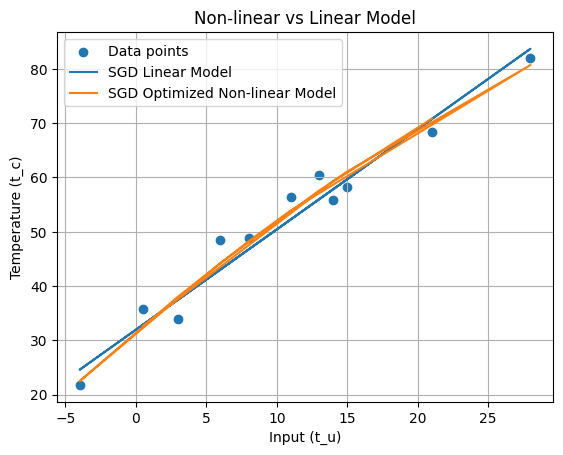

In [15]:
lin_params = torch.tensor([1.0, 0.0], requires_grad=True)
nonlin_params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)

lin_optimizer = optim.SGD([lin_params], lr = 1e-3)
SGD = optim.SGD([nonlin_params], lr = 1e-2)

lin = lin_training(5000, lin_optimizer, lin_params, t_u_train, t_u_valid, t_c_train, t_c_valid)
nonlin_SGD = nonlin_training(5000, SGD, nonlin_params, t_un_train, t_un_valid, t_c_train, t_c_valid)

t_p_lin = lin_model(t_u, *lin).detach().numpy()
t_p_nonSGD = nonlin_model(t_un, *nonlin_SGD).detach().numpy()

plt.scatter(t_u, t_c, label = 'Data points')
plt.plot(t_u, t_p_lin, label = 'SGD Linear Model')
plt.plot(t_u, t_p_nonSGD, label = 'SGD Optimized Non-linear Model')

plt.legend()
plt.xlabel('Input (t_u)')
plt.ylabel('Temperature (t_c)')
plt.title('Non-linear vs Linear Model')
plt.grid(True)
plt.show()